- If we fit a stationary model to data, we assume our data are a realization of a stationary process. So our first step in an analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them.

- treat properties of a time series being stationary or not as another source of information that can be used in feature engineering and feature selection on your time series problem when using machine learning methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

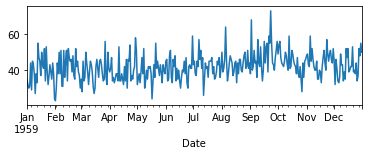

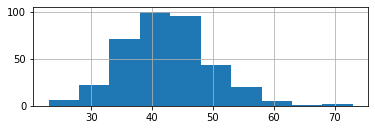

In [2]:
df = pd.read_csv("data/daily-total-female-births.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
plt.figure(1)
plt.subplot(211)
df.plot()
plt.show()
plt.subplot(212)
df.hist()
plt.show()

In [3]:
X = df.values
split = int(len(X)/2)
X1, X2 = X[:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1: %f, mean2: %f' %(mean1, mean2))
print('var1: %f, var2: %f' %(var1, var2))

mean1: 39.763736, mean2: 44.185792
var1: 49.213410, var2: 48.708651


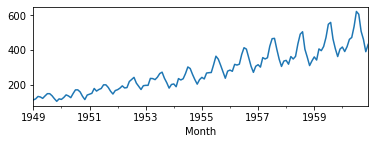

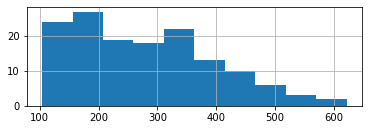

In [4]:
df = pd.read_csv("data/AirPassengers.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
plt.figure(1)
plt.subplot(211)
df.plot()
plt.show()
plt.subplot(212)
df.hist()
plt.show()

In [5]:
X = df.values
split = int(len(X)/2)
X1, X2 = X[:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1: %f, mean2: %f' %(mean1, mean2))
print('var1: %f, var2: %f' %(var1, var2))

mean1: 182.902778, mean2: 377.694444
var1: 2244.087770, var2: 7367.962191


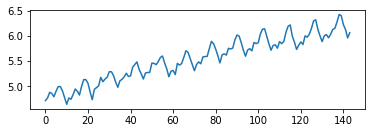

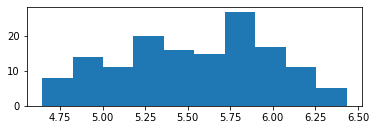

In [6]:
# since exponential growth in seasonality component
X = df.values
X = np.log(X)
plt.figure(1)
plt.subplot(211)
plt.plot(X)
plt.show()
plt.subplot(212)
plt.hist(X)
plt.show()

In [7]:
split = int(len(X)/2)
X1, X2 = X[:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1: %f, mean2: %f' %(mean1, mean2))
print('var1: %f, var2: %f' %(var1, var2))

mean1: 5.175146, mean2: 5.909206
var1: 0.068375, var2: 0.049264


- Dont fool self by looking numbers and plots!

### Augmented Dickey-Fuller Test

- The Augmented Dickey-Fuller test is a type of statistical test called a unit root test1. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend
- It uses an autoregressive model and optimizes an information criterion across multiple different lag values
- **Null Hypothesis (H0)**: Fail to reject, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure
- **Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


- p-value > 0.05: fail to reject H0, data has uniroot and is **non-stationary**
- p-value <= 0.05: reject H0, data doesn't have unitroot and is **stationary**

In [8]:
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv("data/daily-total-female-births.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
X = df.values
result = adfuller(X)
print('ADF Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Citical Values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Citical Values: 
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [9]:
df = pd.read_csv("data/AirPassengers.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
X = df.values
result = adfuller(X)
print('ADF Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Citical Values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Citical Values: 
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [10]:
X = df.values
X = np.log(X)
result = adfuller(X)
print('ADF Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Citical Values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Citical Values: 
	1%: -3.482
	5%: -2.884
	10%: -2.579
